# K8

Concentrations used:

Idx - [IPTG]

C1 - 0.1 mM

C2 - 0.2 mM

C3 - 0.4 mM

C4 - 0.5 mM

C5 - 0.8 mM

In [44]:
%matplotlib inline

import sys
sys.path.insert(0, '../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
import glob
from math import sqrt



## Definitions...

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )

ColumnNames = {
    'A' : "NoPlasmid",
    'B' : "-control",
    'C' : "ZeroC",
    'D' : "C1",
    'E' : "C2",
    'F' : "C3",
    'G' : "C4",
    'H' : "C5",
}

MeaningColNames = { v: k for k, v in ColumnNames.items()}

def allCols(labels, r0 = 1, rf = 9):
    if type(labels) != list: 
        labels = [labels]
    cols = []
    for label in labels:
        row  = MeaningColNames[label]
        for j in range(r0,rf+1):
            cols.append(row + '0' + str(j))
    return cols

### Reading measurements

In [30]:
FLlist = []
tidx = []

for file in glob.glob("K8*.txt"):
    tidx.append( float( file.split(' ')[2].split('.')[0] ) )
    FLlist.append(file)

Idx = np.argsort(tidx)
FLlist = np.array(FLlist)[Idx]

ODlist = []
for j in range(1,14):
    ODlist.append("OD "+str(j)+".txt")

Now reading all the data...

In [17]:
fldata = LabLib.ReadFluor_timefmt_nanomed(FLlist)

Showing some of the data...

In [18]:
fldata[allCols('NoPlasmid')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,850.731,926.555,964.337,773.547,718.900,896.479,872.418,892.312,979.305
1,784.056,957.895,901.795,715.329,680.552,797.321,826.877,789.593,945.554
2,786.949,775.134,811.304,737.344,694.868,769.156,754.109,793.235,895.883


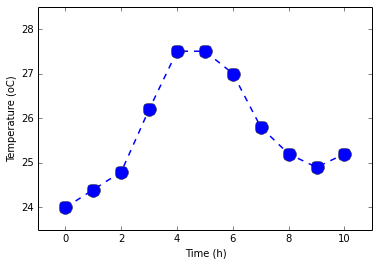

In [28]:
pl.plot(fldata['T(oC)'], 'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2))

pl.xlabel('Time (h)')
pl.xlim(-1,11)
pl.ylabel('Temperature (oC)')
pl.ylim(23.5,28.5)
pl.show()

Temperature seems quite reasonable accross different boards.

### OD measurements

In [31]:
oddata = LabLib.ReadFluor_timefmt_nanomed(ODlist, nr_header=2)

In [72]:
# Board configuration
ODorganization = {
    'ZeroC'  :  ['A11', 'A12', 'B01'], 
    '-control'  : ['A05', 'A06', 'A07'],
    'C1'  : ['B05', 'B06', 'B07'],
    'C2'  : ['B08', 'B09', 'B10'],
    'C3'  : ['B11', 'B12', 'C01'],
    'C4'  : ['C02', 'C03', 'C04'],
    'C5'  : ['C05', 'C06', 'C07'],
    }

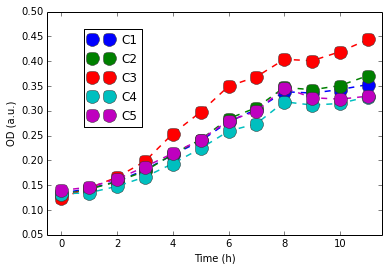

In [143]:
for CASE in ['C1','C2','C3','C4','C5']:
    pl.plot(np.mean(np.array(oddata[ODorganization[CASE]]), axis=1), 
            'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2), label=CASE)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('OD (a.u.)')
pl.ylim(0.05,0.5)
pl.legend(bbox_to_anchor=(0.3, 0.95))
pl.show()
pl.show()

### Baselines: -control and NoPlasmid

Control activity


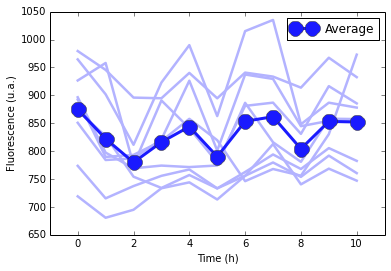

In [71]:
print 'Control activity'

pl.plot(fldata[allCols('NoPlasmid')], color=(0.7,0.7,1.0), lw=2.5)
pl.plot( np.mean(np.array( fldata[allCols('NoPlasmid')] ), axis=1), 
        'o-', lw=3., markersize=15., color=(0.1,0.1,1.0), markeredgecolor=(0.2,0.2,0.2), label="Average")

pl.xlim(-1,11)
pl.legend()
pl.ylabel('Fluorescence (u.a.)')
pl.xlabel('Time (h)')
pl.show()

As expected, we see no significant differences (still got to do a statistical test!).

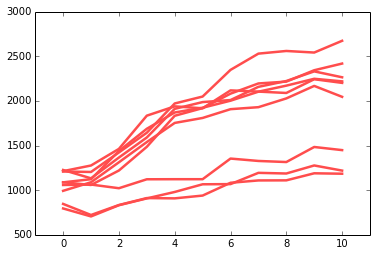

In [45]:
pl.plot(fldata[allCols('-control')], color=(1.0,0.3,0.3), lw=2.5)

pl.xlim(-1,11)
pl.show()

Rhamnose seems to be the stronger promoter to the positive control. It looks like a clear sign in this direction. Let's now take a look at the average value as function of time.

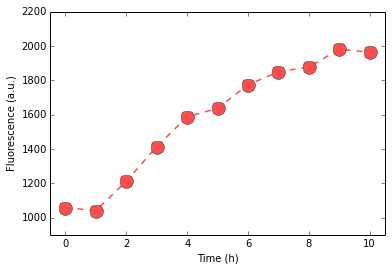

In [57]:
pl.plot(np.mean(np.array( fldata[allCols('-control')] ), axis=1), 
            'o--', lw=1.5, markersize=13., color=(1.0,0.3,0.3), markeredgecolor=(0.2,0.2,0.2))

pl.xlabel('Time (h)')
pl.xlim(-0.5,10.5)
pl.ylabel('Fluorescence (a.u.)')
pl.ylim(900,2200)
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Just to have an idea of the order of the fluorescence differences, let's evaluate the average difference between Arabinose and Rhamnose.

### Quick check on the zero-concentration data


Next, let's see how is the zero-concentration evolving.

In [104]:
Normd = fldata[allCols('ZeroC')]/oddata[ODorganization['ZeroC']].mean().mean()

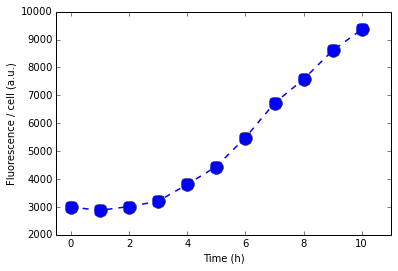

In [107]:
ZeroLevel = np.mean(np.array(Normd[allCols('ZeroC')]), axis=1)
pl.plot(ZeroLevel, 'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2) )

pl.xlabel('Time (h)')
pl.xlim(-0.5,11)
pl.ylabel('Fluorescence / cell (a.u.)')
#pl.ylim(700,1400)
pl.legend(bbox_to_anchor=(0.7, 0.9))
pl.show()

### Preparing and normalizing promoter data

Next, let's plot the time evolution of each concentration

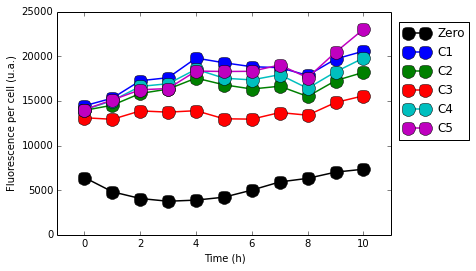

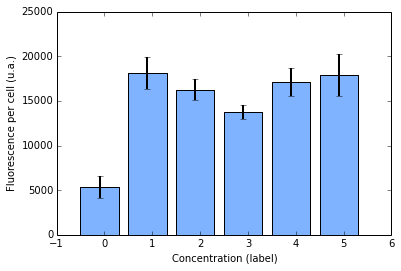

In [158]:
Cj_ts = np.mean(np.array(fldata[allCols('ZeroC')]), axis=1) \
        /np.mean(np.array( oddata[ODorganization['ZeroC']] )[:11], axis=1)
pl.plot( Cj_ts, 
        'o-', lw=1.5, markersize=13., color='k', label='Zero')

mds = [Cj_ts.mean()]
stds = [Cj_ts.std()]

for j in ['C1', 'C2', 'C3', 'C4', 'C5']:
    Cj_ts = np.mean(np.array(fldata[allCols(j)]), axis=1) \
        /np.mean(np.array( oddata[ODorganization[j]] )[:11], axis=1)
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    stds.append( Cj_ts.std() )
    
pl.xlim(-1,11)
pl.xlabel('Time (h)')
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(1.25, 0.98))
pl.show()


error_config = {'ecolor': '0.', 'width': 10.0, 'linewidth' : 2.}
pl.bar(np.array(range(6)) - 0.5, mds, yerr=stds, error_kw=error_config, color=(0.5,0.7,1.0))
pl.xlabel('Concentration (label)')
pl.ylabel('Fluorescence per cell (u.a.)')
pl.show()

To have an idea of how strong the GFP signal is, let's compare it with the zero-level.

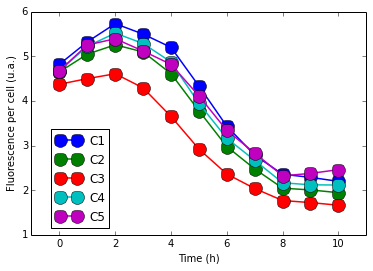

In [146]:
mds = []
for j in ['C1', 'C2', 'C3', 'C4', 'C5']:
    Cj_ts = np.mean(np.array(fldata[allCols(j)]), axis=1) \
        / np.mean(np.array( oddata[ODorganization[j]] )[:11], axis=1) / ZeroLevel
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    
pl.xlim(-1,11)
pl.xlabel('Time (h)')
pl.ylim(1.,6.0)
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(0.25, 0.5))
pl.show()